In [5]:
from matplotlib import pyplot as plt
import seaborn
from math import sqrt, pi
from poisson_disc import Grid
import random
%matplotlib inline

###Some basic setup:
    - r is the minimum radius between points
    - length and width are rectangular bounds
    - Grid is a class that will generate poisson disc samples with rejection
    - based on the input r and the rectangular bounds.

In [6]:
r = 1
length = 20
width = 10
grid = Grid(r, length, width)

###Here I'm creating a seed for the sampling and then generating samples with Grid.poisson

In [7]:
rand = (random.uniform(0, length), random.uniform(0, width))
data = grid.poisson(rand)

####A convenience function for plotting

In [8]:
def unzip(items):
    return ([item[i] for item in items] for i in range(len(items[0])))

###Output from Grid.poisson with rectangular bounds in red

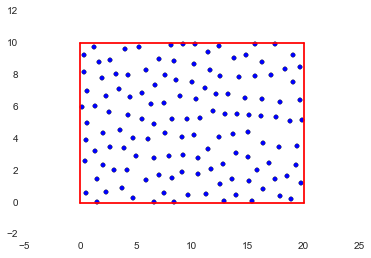

In [9]:
plt.scatter(*unzip(data))
plt.axvline(ymin=2/14, ymax=12/14, color='red')
plt.axvline(x=20, ymin=2/14, ymax=12/14, color='red')
plt.axhline(y=10, xmin=5/30, xmax=25/30, color='red')
plt.axhline(y=0, xmin=5/30, xmax=25/30, color='red')

In [10]:
print("samples: {}".format(len(data)))
print("density : {}".format(round((length*width)/(len(data)*(pi*r**2)), 3)))

samples: 133
density : 0.479


### A similar plot with different radius and rectangular bounds

In [11]:
r = 5
length = 100
width = 80
grid = Grid(r, length, width)

In [12]:
rand = (random.uniform(0, length), random.uniform(0, width))
samples = grid.poisson(rand, 30)

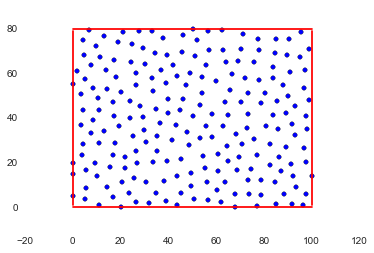

In [13]:
plt.scatter(*unzip(samples))
plt.axvline(x=0, ymin=10/90, ymax=80/90, color='red')
plt.axvline(x=100, ymin=10/90, ymax=80/90, color='red')
plt.axhline(y=80, xmin=20/140, xmax=120/140, color='red')
plt.axhline(y=0, xmin=20/140, xmax=120/140, color='red')

In [14]:
print("samples: {}".format(len(samples)))
print("density: {}".format(round((length*width)/(len(samples)*(pi*r**2)), 2)))

samples: 213
density: 0.48


##Switching over to 3D
### Using smaller bounds 
higher dimension == slower

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
r=.5
length = 4
width = 4
height = 4
grid = Grid(r, length, width, height)

In [13]:
rand = (random.uniform(0, length), random.uniform(0, width), random.uniform(0, height))
data = grid.poisson(rand, 30)

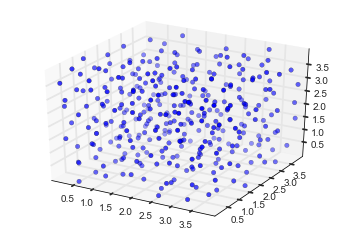

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*unzip(data))
ax.margins(0,0,0)

###Testing that the radial bound isn't violated

In [6]:
def distances(grid, data, r):
    points = {frozenset([item1, item2]) for item1 in data for item2 in data if item1 != item2}
    return [sqrt(grid.distance(*item)) for item in points if grid.distance(*item) < r**2]
# Note here that the grid.distance function actually
# returns the squared distance between points

In [16]:
print(distances(data,r))

[]


In [17]:
print("samples: {}".format(len(data)))
print("density: {}".format(round((length*width*height)/(len(data)*(4/3*pi*r**3)), 2)))

samples: 350
density: 0.35


In [18]:
print("Bounds by sphere packing:")
print("{}  average random packing".format(round(1/.74, 3)))
print("{}  best".format(round(1/.64, 3)))

Bounds by sphere packing:
1.351  average random packing
1.562  best


In [3]:
# switching to taxicab metric
def distance(tup1, tup2):
    return sum(abs(tup1[i] - tup2[i]) for i in range(len(tup1)))**2

def generate(grid):
    def func(point):
        new = [random.choice([random.uniform(-grid.r*2, 0), random.uniform(0, grid.r*2)]) for _ in range(len(point))]
        return tuple(new[i] + point[i] for i in range(len(point)))
    return func

def convert(point):
    return point

In [4]:
r = 5
length = 100
width = 80
grid = Grid(r, length, width)
grid.distance = distance
grid.generate = generate(grid)
grid.convert = convert
rand = (random.uniform(0, length), random.uniform(0, width))
data = grid.poisson(rand, 30)

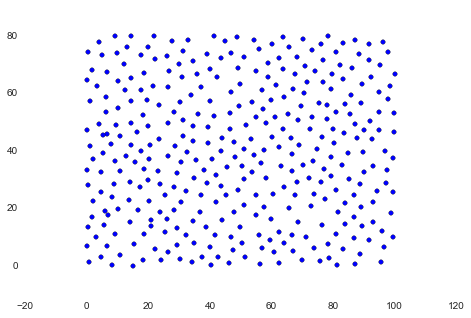

In [5]:
plt.scatter(*unzip(data))
plt.subplots_adjust(left=1, right=2, bottom=1, top=2)

### Some difficulties here - the radial bound is violated, need to rework
### and make it easier to swap out distance functions

In [8]:
distances(grid, data, r)

[1.5687913280487198,
 2.3121631929911146,
 2.084435876449776,
 3.4452740600948033,
 3.889169559136704]

In [26]:
r=1
length = 4
width = 4
height = 4
grid = Grid(r, length, width, height)

In [27]:
grid.distance = distance # 3D with Taxicab metric
grid.generate = generate(grid)
grid.convert = convert

In [28]:
rand = (random.uniform(0, length), random.uniform(0, width), random.uniform(0, height))
data = grid.poisson(rand, 30)

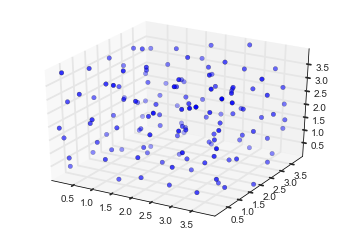

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*unzip(data))
ax.margins(0,0,0)